<figure>
   <IMG SRC="https://mamba-python.nl/images/logo_basis.png" WIDTH=125 ALIGN="right">
   
</figure>

# Analyse data CBR
<br>

**Doel**: 
Data downloaden van het CBR en analyseren.

**stappen**
1. inlezen data
2. combineren van data
3. visualiseren van data

**Gegevens**
- geboortes per 1000 inwoners
- gemeentegrenzen

table of content:<a class="anchor" id="0"></a>
1. [inlezen](#1)
2. [combineren data](#2)
3. [visualiseren](#3)


[back to TOC](#0)
## 1. inlezen data<a class="anchor" id="1"></a>

In [7]:
import pandas as pd
import geopandas as gpd
import requests
import matplotlib.pyplot as plt
import cbsodata
import nlmod

In [8]:
#settings
%matplotlib inline
plt.style.use('default')

#### gemeentegrenzen
De gemeentegrenzen worden via de API van het Nationaal Georegister van PDOK opgehaald. 

In [3]:
gemeentegrenzen = nlmod.read.administrative.get_municipalities()

#### CBR geboortecijfers
De geboortecijfers worden via de API van het CBS opgehaald.

In [50]:
# laad geboorte data in
geboorte_data = cbsodata.get_data('83765NED', select=['GeboorteRelatief_25','WijkenEnBuurten','Gemeentenaam_1','SoortRegio_2','Codering_3'])

# zet om naar dataframe
geboorte_df = pd.DataFrame(geboorte_data)

# filter op gemeenten
geboorte_df = geboorte_df.loc[geboorte_df['SoortRegio_2'] == 'Gemeente  ']

# strip whitespace van codering
geboorte_df['Codering_3'] = geboorte_df['Codering_3'].apply(lambda x: x.strip())

geboorte_df

,GeboorteRelatief_25,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3
1,6,Aa en Hunze,Aa en Hunze,Gemeente,GM1680
77,10,Aalburg,Aalburg,Gemeente,GM0738
100,7,Aalsmeer,Aalsmeer,Gemeente,GM0358
113,8,Aalten,Aalten,Gemeente,GM0197
147,9,Achtkarspelen,Achtkarspelen,Gemeente,GM0059
...,...,...,...,...,...
16374,7,Zundert,Zundert,Gemeente,GM0879
16391,8,Zutphen,Zutphen,Gemeente,GM0301
16429,12,Zwartewaterland,Zwartewaterland,Gemeente,GM1896
16470,11,Zwijndrecht,Zwijndrecht,Gemeente,GM0642


[back to TOC](#0)

## 2. samenvoegen data<a class="anchor" id="2"></a>

Gebruik de `merge` functie om de gemeentegrenzen te koppelen aan de geboortecijfers per gemeente.

In [51]:
geboorten_merged = pd.merge(
    gemeentegrenzen,
    geboorte_df,
    left_on="gemeentecode",
    right_on="Codering_3",
)
geboorten_merged

,gml_id,gemeentecode,water,omgevingsadressendichtheid,stedelijkheidAdressenPerKm2,bevolkingsdichtheidInwonersPerKm2,aantalInwoners,mannen,vrouwen,percentagePersonen0Tot15Jaar,...,attractieparkGemiddeldAantalBinnen50Km,jrstatcode,jaar,fuuid,geometry,GeboorteRelatief_25,WijkenEnBuurten,Gemeentenaam_1,SoortRegio_2,Codering_3
0,gemeenten.63654cc8-9e00-48d5-8609-4c653cbc00e8,GM0014,NEE,3373,1,1266,234950,116894,118056,12,...,18.3,2022GM0014,2022,gemeenten.63654cc8-9e00-48d5-8609-4c653cbc00e8,"POLYGON ((234874.427 575864.890, 234875.514 57...",9,Groningen,Groningen,Gemeente,GM0014
1,gemeenten.05bff81f-149c-401b-9fca-fefb34abac01,GM0489,NEE,1680,2,2488,48714,23983,24731,17,...,65.1,2022GM0489,2022,gemeenten.05bff81f-149c-401b-9fca-fefb34abac01,"POLYGON ((96347.423 427296.139, 96200.019 4272...",8,Barendrecht,Barendrecht,Gemeente,GM0489
2,gemeenten.f56c4626-bd0e-41e7-9b30-b7c6cf39165d,GM1926,NEE,1563,2,1534,56572,28138,28434,19,...,59.4,2022GM1926,2022,gemeenten.f56c4626-bd0e-41e7-9b30-b7c6cf39165d,"POLYGON ((86358.560 450485.631, 86348.487 4504...",10,Pijnacker-Nootdorp,Pijnacker-Nootdorp,Gemeente,GM1926
3,gemeenten.2be26d07-c144-44aa-99ac-95fd318a9750,GM0296,NEE,1236,3,626,41344,20369,20975,15,...,33.4,2022GM0296,2022,gemeenten.2be26d07-c144-44aa-99ac-95fd318a9750,"POLYGON ((177635.116 427953.443, 177653.646 42...",8,Wijchen,Wijchen,Gemeente,GM0296
4,gemeenten.034b2062-2b89-4444-8122-5ff93a3eaf55,GM0148,NEE,514,4,177,29162,14751,14411,17,...,37.2,2022GM0148,2022,gemeenten.034b2062-2b89-4444-8122-5ff93a3eaf55,"POLYGON ((219938.965 497000.464, 219941.635 49...",10,Dalfsen,Dalfsen,Gemeente,GM0148
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
324,gemeenten.6ce2776e-fbe2-40cd-8c97-d4d192fca1be,GM0222,NEE,1166,3,741,58546,29062,29484,15,...,19.2,2022GM0222,2022,gemeenten.6ce2776e-fbe2-40cd-8c97-d4d192fca1be,"POLYGON ((217336.197 439868.406, 217336.192 43...",9,Doetinchem,Doetinchem,Gemeente,GM0222
325,gemeenten.dce03de9-e67c-4639-b88b-4506aee2849a,GM1730,NEE,512,4,240,34221,16873,17348,17,...,22.1,2022GM1730,2022,gemeenten.dce03de9-e67c-4639-b88b-4506aee2849a,"POLYGON ((236869.663 563085.599, 236869.570 56...",8,Tynaarlo,Tynaarlo,Gemeente,GM1730
326,gemeenten.56044fce-1437-4257-ae82-dc62c02fcc28,GM0216,NEE,1482,3,1004,29397,14571,14826,17,...,39.1,2022GM0216,2022,gemeenten.56044fce-1437-4257-ae82-dc62c02fcc28,"POLYGON ((145933.989 440650.667, 145941.152 44...",9,Culemborg,Culemborg,Gemeente,GM0216
327,gemeenten.6f96efe4-5ea4-419b-a8d6-e6ddc295afac,GM0402,NEE,2781,1,2013,91733,45092,46641,17,...,60.6,2022GM0402,2022,gemeenten.6f96efe4-5ea4-419b-a8d6-e6ddc295afac,"POLYGON ((140123.546 465651.399, 140103.362 46...",9,Hilversum,Hilversum,Gemeente,GM0402


[back to TOC](#0)

## 3. visualisatie<a class="anchor" id="3"></a>

Text(0.5, 1.0, 'Levend geborenen per 1000 inwoners, 2017')

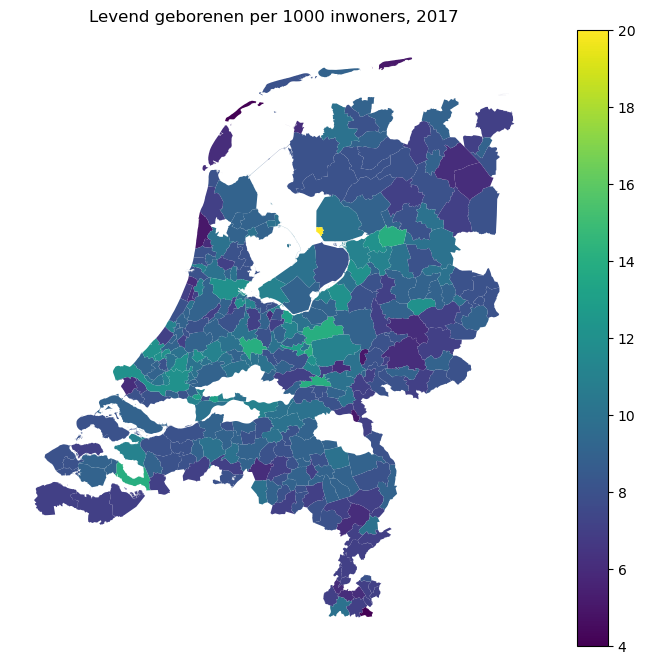

In [52]:
fig, ax = plt.subplots(figsize=(10, 8))
p = geboorten_merged.plot(column="GeboorteRelatief_25", ax=ax, legend=True)
p.axis("off")
p.set_title("Levend geborenen per 1000 inwoners, 2017")

[back to TOC](#0)

## Acknowledgement <a class="anchor" id="4"></a>

Deze notebook is gemaakt met behulp van de volgende bronnen:

- https://cbsodata.readthedocs.io/en/latest/readme_link.html
